In [33]:

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors
pd.set_option('display.max_columns',40)


In [34]:

import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics


import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
import os 

import pandas as pd
from lightgbm.sklearn import LGBMClassifier
from sklearn.impute import SimpleImputer
import math
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [36]:
train_data = pd.read_csv('H:\\work\\work\\柳洪宙\\train_data.csv')
test_data = pd.read_csv('H:\\work\\work\\柳洪宙\\test_data.csv')

In [37]:
train_data.head()

,Age,Gender,BMI,AST,HDL_C,LDL,BUN,CR,Triglyceride,Cholesterol,ALT,DBP,SBP,FPG,Family,status_6
0,36,1,31.5,19.0,1.34,3.20,5.21,104.0,2.30,5.00,17.0,67,116,5.34,2,0
1,54,2,19.2,28.3,1.84,3.30,3.94,67.7,1.32,5.81,16.6,62,108,4.91,2,0
2,51,1,22.1,23.6,1.27,3.52,4.10,57.8,1.70,5.59,54.4,67,110,5.60,2,0
3,30,1,18.7,18.5,1.12,2.95,5.45,69.5,0.77,4.79,11.8,67,104,4.63,2,0
4,35,2,23.1,20.0,1.24,2.65,3.75,54.0,0.40,4.20,12.0,62,123,5.37,2,0


In [38]:
from sklearn import preprocessing 
import numpy as np

#训练集
Age1 = pd.DataFrame(preprocessing.scale(train_data['Age'].values.reshape(-1,1)),columns=['Age1'])
BMI1 = pd.DataFrame(preprocessing.scale(train_data['BMI'].values.reshape(-1,1)),columns=['BMI1'])
#AST1 = pd.DataFrame(preprocessing.scale(train_data['AST'].values.reshape(-1,1)),columns=['AST1'])
#HDL_C1 = pd.DataFrame(preprocessing.scale(train_data['HDL_C'].values.reshape(-1,1)),columns=['HDL_C1'])
#LDL1 = pd.DataFrame(preprocessing.scale(train_data['LDL'].values.reshape(-1,1)),columns=['LDL1'])
#BUN1 = pd.DataFrame(preprocessing.scale(train_data['BUN'].values.reshape(-1,1)),columns=['BUN1'])
CR1 = pd.DataFrame(preprocessing.scale(train_data['CR'].values.reshape(-1,1)),columns=['CR1'])
Triglyceride1 = pd.DataFrame(preprocessing.scale(train_data['Triglyceride'].values.reshape(-1,1)),columns=['Triglyceride1'])
#Cholesterol1 = pd.DataFrame(preprocessing.scale(train_data['Cholesterol'].values.reshape(-1,1)),columns=['Cholesterol1'])
ALT1 = pd.DataFrame(preprocessing.scale(train_data['ALT'].values.reshape(-1,1)),columns=['ALT1'])
DBP1 = pd.DataFrame(preprocessing.scale(train_data['DBP'].values.reshape(-1,1)),columns=['DBP1'])
#SBP1 = pd.DataFrame(preprocessing.scale(train_data['SBP'].values.reshape(-1,1)),columns=['SBP1'])
FPG1 = pd.DataFrame(preprocessing.scale(train_data['FPG'].values.reshape(-1,1)),columns=['FPG1'])

train_data = pd.concat([train_data,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1],axis=1)

#验证集
Age1 = pd.DataFrame(preprocessing.scale(test_data['Age'].values.reshape(-1,1)),columns=['Age1'])
BMI1 = pd.DataFrame(preprocessing.scale(test_data['BMI'].values.reshape(-1,1)),columns=['BMI1'])
#AST1 = pd.DataFrame(preprocessing.scale(test_data['AST'].values.reshape(-1,1)),columns=['AST1'])
#HDL_C1 = pd.DataFrame(preprocessing.scale(test_data['HDL_C'].values.reshape(-1,1)),columns=['HDL_C1'])
#LDL1 = pd.DataFrame(preprocessing.scale(test_data['LDL'].values.reshape(-1,1)),columns=['LDL1'])
#BUN1 = pd.DataFrame(preprocessing.scale(test_data['BUN'].values.reshape(-1,1)),columns=['BUN1'])
CR1 = pd.DataFrame(preprocessing.scale(test_data['CR'].values.reshape(-1,1)),columns=['CR1'])
Triglyceride1 = pd.DataFrame(preprocessing.scale(test_data['Triglyceride'].values.reshape(-1,1)),columns=['Triglyceride1'])
#Cholesterol1 = pd.DataFrame(preprocessing.scale(test_data['Cholesterol'].values.reshape(-1,1)),columns=['Cholesterol1'])
ALT1 = pd.DataFrame(preprocessing.scale(test_data['ALT'].values.reshape(-1,1)),columns=['ALT1'])
DBP1 = pd.DataFrame(preprocessing.scale(test_data['DBP'].values.reshape(-1,1)),columns=['DBP1'])
#SBP1 = pd.DataFrame(preprocessing.scale(test_data['SBP'].values.reshape(-1,1)),columns=['SBP1'])
FPG1 = pd.DataFrame(preprocessing.scale(test_data['FPG'].values.reshape(-1,1)),columns=['FPG1'])

test_data = pd.concat([test_data,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1],axis=1)


In [39]:

# import sklearn.preprocessing as pre
# minmax  =  pre.MinMaxScaler()

# #训练集
# Age1 = pd.DataFrame(minmax.fit_transform(train_data['Age'].values.reshape(-1,1)),columns=['Age1'])
# BMI1 = pd.DataFrame(minmax.fit_transform(train_data['BMI'].values.reshape(-1,1)),columns=['BMI1'])
# AST1 = pd.DataFrame(minmax.fit_transform(train_data['AST'].values.reshape(-1,1)),columns=['AST1'])
# HDL_C1 = pd.DataFrame(minmax.fit_transform(train_data['HDL_C'].values.reshape(-1,1)),columns=['HDL_C1'])
# LDL1 = pd.DataFrame(minmax.fit_transform(train_data['LDL'].values.reshape(-1,1)),columns=['LDL1'])
# BUN1 = pd.DataFrame(minmax.fit_transform(train_data['BUN'].values.reshape(-1,1)),columns=['BUN1'])
# CR1 = pd.DataFrame(minmax.fit_transform(train_data['CR'].values.reshape(-1,1)),columns=['CR1'])
# Triglyceride1 = pd.DataFrame(minmax.fit_transform(train_data['Triglyceride'].values.reshape(-1,1)),columns=['Triglyceride1'])
# Cholesterol1 = pd.DataFrame(minmax.fit_transform(train_data['Cholesterol'].values.reshape(-1,1)),columns=['Cholesterol1'])
# ALT1 = pd.DataFrame(minmax.fit_transform(train_data['ALT'].values.reshape(-1,1)),columns=['ALT1'])
# DBP1 = pd.DataFrame(minmax.fit_transform(train_data['DBP'].values.reshape(-1,1)),columns=['DBP1'])
# SBP1 = pd.DataFrame(minmax.fit_transform(train_data['SBP'].values.reshape(-1,1)),columns=['SBP1'])
# FPG1 = pd.DataFrame(minmax.fit_transform(train_data['FPG'].values.reshape(-1,1)),columns=['FPG1'])

# train_data = pd.concat([train_data,Age1,BMI1,AST1,HDL_C1,LDL1,BUN1,CR1,Triglyceride1,Cholesterol1,ALT1,DBP1,SBP1,FPG1],axis=1)


# #验证集
# Age1 = pd.DataFrame(minmax.fit_transform(test_data['Age'].values.reshape(-1,1)),columns=['Age1'])
# BMI1 = pd.DataFrame(minmax.fit_transform(test_data['BMI'].values.reshape(-1,1)),columns=['BMI1'])
# AST1 = pd.DataFrame(minmax.fit_transform(test_data['AST'].values.reshape(-1,1)),columns=['AST1'])
# HDL_C1 = pd.DataFrame(minmax.fit_transform(test_data['HDL_C'].values.reshape(-1,1)),columns=['HDL_C1'])
# LDL1 = pd.DataFrame(minmax.fit_transform(test_data['LDL'].values.reshape(-1,1)),columns=['LDL1'])
# BUN1 = pd.DataFrame(minmax.fit_transform(test_data['BUN'].values.reshape(-1,1)),columns=['BUN1'])
# CR1 = pd.DataFrame(minmax.fit_transform(test_data['CR'].values.reshape(-1,1)),columns=['CR1'])
# Triglyceride1 = pd.DataFrame(minmax.fit_transform(test_data['Triglyceride'].values.reshape(-1,1)),columns=['Triglyceride1'])
# Cholesterol1 = pd.DataFrame(minmax.fit_transform(test_data['Cholesterol'].values.reshape(-1,1)),columns=['Cholesterol1'])
# ALT1 = pd.DataFrame(minmax.fit_transform(test_data['ALT'].values.reshape(-1,1)),columns=['ALT1'])
# DBP1 = pd.DataFrame(minmax.fit_transform(test_data['DBP'].values.reshape(-1,1)),columns=['DBP1'])
# SBP1 = pd.DataFrame(minmax.fit_transform(test_data['SBP'].values.reshape(-1,1)),columns=['SBP1'])
# FPG1 = pd.DataFrame(minmax.fit_transform(test_data['FPG'].values.reshape(-1,1)),columns=['FPG1'])

# test_data = pd.concat([test_data,Age1,BMI1,AST1,HDL_C1,LDL1,BUN1,CR1,Triglyceride1,Cholesterol1,ALT1,DBP1,SBP1,FPG1],axis=1)

In [40]:
train_data.head()

,Age,Gender,BMI,AST,HDL_C,LDL,BUN,CR,Triglyceride,Cholesterol,ALT,DBP,SBP,FPG,Family,status_6,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1
0,36,1,31.5,19.0,1.34,3.20,5.21,104.0,2.30,5.00,17.0,67,116,5.34,2,0,-0.612655,2.446564,1.953772,0.918069,-0.306400,-0.681976,0.586832
1,54,2,19.2,28.3,1.84,3.30,3.94,67.7,1.32,5.81,16.6,62,108,4.91,2,0,0.782147,-1.272216,-0.261811,-0.050774,-0.323998,-1.138815,-0.132003
2,51,1,22.1,23.6,1.27,3.52,4.10,57.8,1.70,5.59,54.4,67,110,5.60,2,0,0.549680,-0.395430,-0.866060,0.324900,1.339036,-0.681976,1.021476
3,30,1,18.7,18.5,1.12,2.95,5.45,69.5,0.77,4.79,11.8,67,104,4.63,2,0,-1.077589,-1.423386,-0.151947,-0.594513,-0.535177,-0.681976,-0.600081
4,35,2,23.1,20.0,1.24,2.65,3.75,54.0,0.40,4.20,12.0,62,123,5.37,2,0,-0.690144,-0.093090,-1.097995,-0.960301,-0.526378,-1.138815,0.636983


In [41]:
test_data.head()

,Age,Gender,BMI,AST,HDL_C,LDL,BUN,CR,Triglyceride,Cholesterol,ALT,DBP,SBP,FPG,Family,status_6,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1
0,36,1,22.2,26.4,1.62,2.93,4.77,98.1,0.93,4.89,21.4,61,93,3.69,2,0,-0.605130,-0.364241,1.658332,-0.422307,-0.126617,-1.210593,-2.148889
1,56,1,23.9,24.0,1.72,1.88,4.52,71.0,1.00,3.79,24.0,80,125,4.49,2,0,0.954009,0.154689,-0.058196,-0.357117,0.001616,0.508581,-0.829532
2,69,2,25.6,23.8,1.97,2.65,5.38,64.5,0.71,4.86,11.7,88,146,5.74,2,0,1.967450,0.673619,-0.469909,-0.627189,-0.605029,1.232444,1.231964
3,36,2,17.1,20.0,1.38,3.51,3.99,61.0,0.65,5.35,10.0,69,104,4.94,2,0,-0.605130,-1.921031,-0.691601,-0.683065,-0.688874,-0.486730,-0.087393
4,30,2,20.8,18.6,1.18,1.81,2.80,61.1,2.49,3.94,10.2,78,121,5.40,2,0,-1.072872,-0.791595,-0.685267,1.030493,-0.679010,0.327615,0.671238


In [42]:
train_data = train_data.drop(['Age', 'BMI','AST','HDL_C','LDL','BUN','CR','Triglyceride','Cholesterol','ALT','DBP','SBP','FPG'], axis=1)
test_data = test_data.drop(['Age', 'BMI','AST','HDL_C','LDL','BUN','CR','Triglyceride','Cholesterol','ALT','DBP','SBP','FPG'], axis=1)
train_data.head()

,Gender,Family,status_6,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1
0,1,2,0,-0.612655,2.446564,1.953772,0.918069,-0.306400,-0.681976,0.586832
1,2,2,0,0.782147,-1.272216,-0.261811,-0.050774,-0.323998,-1.138815,-0.132003
2,1,2,0,0.549680,-0.395430,-0.866060,0.324900,1.339036,-0.681976,1.021476
3,1,2,0,-1.077589,-1.423386,-0.151947,-0.594513,-0.535177,-0.681976,-0.600081
4,2,2,0,-0.690144,-0.093090,-1.097995,-0.960301,-0.526378,-1.138815,0.636983


In [43]:
train_data = train_data.assign(status=train_data['status_6'])
test_data = test_data.assign(status=test_data['status_6'])

train_data = train_data.drop(['status_6'], axis=1)
test_data = test_data.drop(['status_6'], axis=1)

train_data.head()


,Gender,Family,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1,status
0,1,2,-0.612655,2.446564,1.953772,0.918069,-0.306400,-0.681976,0.586832,0
1,2,2,0.782147,-1.272216,-0.261811,-0.050774,-0.323998,-1.138815,-0.132003,0
2,1,2,0.549680,-0.395430,-0.866060,0.324900,1.339036,-0.681976,1.021476,0
3,1,2,-1.077589,-1.423386,-0.151947,-0.594513,-0.535177,-0.681976,-0.600081,0
4,2,2,-0.690144,-0.093090,-1.097995,-0.960301,-0.526378,-1.138815,0.636983,0


In [44]:
# 将数据写出到csv文档

# train_data.to_csv('train_data_py.csv', index=False)
# test_data.to_csv('test_data_py.csv', index=False)

In [45]:
test_data.head()

,Gender,Family,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1,status
0,1,2,-0.605130,-0.364241,1.658332,-0.422307,-0.126617,-1.210593,-2.148889,0
1,1,2,0.954009,0.154689,-0.058196,-0.357117,0.001616,0.508581,-0.829532,0
2,2,2,1.967450,0.673619,-0.469909,-0.627189,-0.605029,1.232444,1.231964,0
3,2,2,-0.605130,-1.921031,-0.691601,-0.683065,-0.688874,-0.486730,-0.087393,0
4,2,2,-1.072872,-0.791595,-0.685267,1.030493,-0.679010,0.327615,0.671238,0


In [46]:
#识别训练数据中的缺失值
#print(train_data.isnull().any())

In [47]:
#识别测试数据中的缺失值
#print(train_data.isnull().any())

In [48]:
X_train = train_data.iloc[:,np.r_[0:9]]
y_train = train_data[['status']]
X_test = test_data.iloc[:,np.r_[0:9]]
y_test = test_data[['status']]


In [49]:
X_train

,Gender,Family,Age1,BMI1,CR1,Triglyceride1,ALT1,DBP1,FPG1
0,1,2,-0.612655,2.446564,1.953772,0.918069,-0.306400,-0.681976,0.586832
1,2,2,0.782147,-1.272216,-0.261811,-0.050774,-0.323998,-1.138815,-0.132003
2,1,2,0.549680,-0.395430,-0.866060,0.324900,1.339036,-0.681976,1.021476
3,1,2,-1.077589,-1.423386,-0.151947,-0.594513,-0.535177,-0.681976,-0.600081
4,2,2,-0.690144,-0.093090,-1.097995,-0.960301,-0.526378,-1.138815,0.636983
...,...,...,...,...,...,...,...,...,...
33919,1,2,0.007257,0.904631,1.465490,2.104408,0.221547,-0.042401,-0.483061
33920,2,2,-0.922611,-1.332684,-1.091891,-0.179294,-0.675963,-0.133769,-0.315891
33921,1,2,-0.147721,1.811650,-0.670747,1.254199,5.457027,1.419484,-0.315891
33922,2,2,1.092103,1.176737,-1.043063,-0.456107,-0.464784,0.962645,0.519964


In [50]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (33924, 9)
y_train shape (33924, 1)
X_test shape (14539, 9)
y_test shape (14539, 1)


In [51]:
seed=24

In [52]:
##LR model 1
LR = LogisticRegression(penalty='l2',
                        tol=0.0001,
                        C=21.544346900318832,
                        solver="liblinear",
                        max_iter=5000) 
LR.fit(X_train, y_train)
LR_y_proba=LR.predict_proba(X_train)
LR_y_pre=LR.predict(X_train)
print(confusion_matrix(y_train, LR_y_pre))
LR_score = LR.score(X_train, y_train)
LR_accuracy_score=accuracy_score(y_train,LR_y_pre)
LR_preci_score=precision_score(y_train,LR_y_pre)
LR_recall_score=recall_score(y_train,LR_y_pre)
LR_f1_score=f1_score(y_train,LR_y_pre)
LR_auc=roc_auc_score(y_train,LR_y_proba[:,1])


print('LR_accuracy_score:%.3f,LR_preci_score:%.3f,LR_recall_score:%.3f,LR_f1_score:%.3f,LR_auc:%.3f'
      %(LR_accuracy_score,LR_preci_score,LR_recall_score,LR_f1_score,LR_auc))

[[32966    92]
 [  765   101]]
LR_accuracy_score:0.975,LR_preci_score:0.523,LR_recall_score:0.117,LR_f1_score:0.191,LR_auc:0.914


In [74]:
## SVM model 2
SVM = SVC(C=6, 
            gamma=0.2, 
            kernel="rbf",
            probability=True)  

SVM.fit(X_train, y_train)
SVM_y_pre=SVM.predict(X_train)
SVM_y_proba=SVM.predict_proba(X_train)
SVM_score = SVM.score(X_train, y_train)
SVM_accuracy_score=accuracy_score(y_train,SVM_y_pre)
SVM_preci_score=precision_score(y_train,SVM_y_pre)
SVM_recall_score=recall_score(y_train,SVM_y_pre)
SVM_f1_score=f1_score(y_train,SVM_y_pre)
SVM_auc=roc_auc_score(y_train,SVM_y_proba[:,1])


print('SVM_accuracy_score:%.3f,SVM_preci_score:%.3f,SVM_recall_score:%.3f,SVM_f1_score:%.3f,SVM_auc:%.3f'
      %(SVM_accuracy_score,SVM_preci_score,SVM_recall_score,SVM_f1_score,SVM_auc))

SVM_accuracy_score:0.981,SVM_preci_score:0.954,SVM_recall_score:0.263,SVM_f1_score:0.413,SVM_auc:0.896


In [54]:
##RandomForest model 4
RF=RandomForestClassifier(criterion="entropy",
                              max_features="sqrt", 
                              min_samples_split=3, 
                              n_estimators=10,
                              min_samples_leaf =3,
                              random_state =seed ) 
RF.fit(X_train,y_train)
RF_y_pre=RF.predict(X_train)
RF_y_proba=RF.predict_proba(X_train)
RF_accuracy_score=accuracy_score(y_train,RF_y_pre)
RF_preci_score=precision_score(y_train,RF_y_pre)
RF_recall_score=recall_score(y_train,RF_y_pre)
RF_f1_score=f1_score(y_train,RF_y_pre)
RF_auc=roc_auc_score(y_train,RF_y_proba[:,1])


print('RF_accuracy_score:%.3f,RF_preci_score:%.3f,RF_recall_score:%.3f,RF_f1_score:%.3f,RF_auc:%.3f'
      %(RF_accuracy_score,RF_preci_score,RF_recall_score,RF_f1_score,RF_auc))

RF_accuracy_score:0.986,RF_preci_score:0.978,RF_recall_score:0.469,RF_f1_score:0.634,RF_auc:0.998


In [55]:
##XGB model 6
XGB=XGBClassifier(learning_rate=0.6,
                    n_estimators=250,
                    colsample_bytree=0.5,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0.1,
                    random_state=seed,
                     subsample=0.3) 
XGB.fit(X_train,y_train)
XGB_y_pre=XGB.predict(X_train)
XGB_y_proba=XGB.predict_proba(X_train)
XGB_accuracy_score=accuracy_score(y_train,XGB_y_pre)
XGB_preci_score=precision_score(y_train,XGB_y_pre)
XGB_recall_score=recall_score(y_train,XGB_y_pre)
XGB_f1_score=f1_score(y_train,XGB_y_pre)
XGB_auc=roc_auc_score(y_train,XGB_y_pre)
XGB_auc=roc_auc_score(y_train,XGB_y_proba[:,1])


print('XGB_accuracy_score:%.3f,XGB_preci_score:%.3f,XGB_recall_score:%.3f,XGB_f1_score: %.3f,XGB_auc: %.3f'
      %(XGB_accuracy_score,XGB_preci_score,XGB_recall_score,XGB_f1_score,XGB_auc))

XGB_accuracy_score:0.986,XGB_preci_score:0.775,XGB_recall_score:0.659,XGB_f1_score: 0.712,XGB_auc: 0.986


计算MSE

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import zero_one_loss,log_loss

clf = LR 
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" LR MSE: %.3f" % mse)
def train_zero_one_loss(y_true, y_pred):
    print("zero_one_loss<fraction>:",zero_one_loss(y_true,y_pred,normalize=True))
    print("zero_one_loss<num>:",zero_one_loss(y_true,y_pred,normalize=False))

def train_log_loss(y_true, y_pred):
    print("log_loss<average>:",log_loss(y_true,y_pred,normalize=True))
    print("log_loss<total>:",log_loss(y_true,y_pred,normalize=False))

train_zero_one_loss(y_true, y_pred) 
train_log_loss(y_true, y_pred) 
def train_confusion_matrix(y_true, y_pred):
    print('Confusion Matrix:\n',confusion_matrix(y_true,y_pred,labels=[0,1]))
train_confusion_matrix(y_true, y_pred)

# clf = DT  
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" TR MSE: %.3f" % mse)
def train_zero_one_loss(y_true, y_pred):
    print("zero_one_loss<fraction>:",zero_one_loss(y_true,y_pred,normalize=True))
    print("zero_one_loss<num>:",zero_one_loss(y_true,y_pred,normalize=False))

def train_log_loss(y_true, y_pred):
    print("log_loss<average>:",log_loss(y_true,y_pred,normalize=True))
    print("log_loss<total>:",log_loss(y_true,y_pred,normalize=False))


train_zero_one_loss(y_true, y_pred) 
clf = LR  
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" LR MSE: %.3f" % mse)

# clf = DT
# y_pred = clf.predict(X_train)
# y_true = y_train
# mse = mean_squared_error(y_true, y_pred)
# print(" DT MSE: %.3f" % mse)

clf = RF 
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" RF MSE: %.3f" % mse)

clf = SVM 
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" SVM MSE: %.3f" % mse)

clf = XGB 
y_pred = clf.predict(X_train)
y_true = y_train
mse = mean_squared_error(y_true, y_pred)
print(" XGB MSE: %.3f" % mse)


 LR MSE: 0.025
zero_one_loss<fraction>: 0.02526235113783748
zero_one_loss<num>: 857
log_loss<average>: 0.8725328656232184
log_loss<total>: 29599.80493340206
Confusion Matrix:
 [[32966    92]
 [  765   101]]
 TR MSE: 0.025
zero_one_loss<fraction>: 0.02526235113783748
zero_one_loss<num>: 857
 LR MSE: 0.025
 RF MSE: 0.014
 SVM MSE: 0.019
 XGB MSE: 0.014


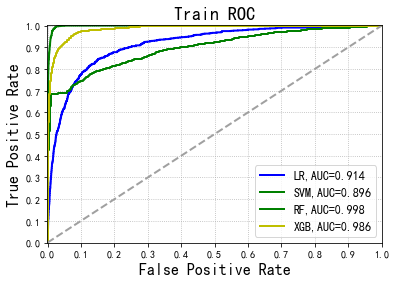

<Figure size 4000x7500 with 0 Axes>

In [57]:
LR_fpr,LR_tpr,LR_threasholds=roc_curve(y_train,LR_y_proba[:,1]) 
SVM_fpr,SVM_tpr,SVM_threasholds=roc_curve(y_train,SVM_y_proba[:,1]) 
RF_fpr,RF_tpr,RF_threasholds=roc_curve(y_train,RF_y_proba[:,1])
XGB_fpr,XGB_tpr,XGB_threasholds=roc_curve(y_train,XGB_y_proba[:,1])
# LGBM_fpr,LGBM_tpr,LGBM_threasholds=roc_curve(y_train,LGBM_y_proba[:,1])

plt.plot(LR_fpr,LR_tpr,c='b',lw=2,label=u'LR,AUC=%.3f' % LR_auc)
plt.plot(SVM_fpr,SVM_tpr,c='g',lw=2,label=u'SVM,AUC=%.3f' % SVM_auc)
plt.plot(RF_fpr,RF_tpr,c='g',lw=2,label=u'RF,AUC=%.3f' % RF_auc)
plt.plot(XGB_fpr,XGB_tpr,c='y',lw=2,label=u'XGB,AUC=%.3f' % XGB_auc)
# plt.plot(LGBM_fpr,LGBM_tpr,c='y',lw=2,label=u'LGBM,AUC=%.3f' % LGBM_auc)



plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'Train ROC', fontsize=18)


plt.savefig('train_roc.png', dpi = 400)
plt.savefig('train_roc.jpeg', dpi = 400)


fig = plt.figure(figsize=(8, 15), dpi= 500)
plt.show()      


In [58]:
##LR model 11
LR = LogisticRegression(penalty='l2',
                        tol=0.0001,
                        C=21.544346900318832,
                        solver="liblinear",
                        max_iter=5000) 
LR.fit(X_train, y_train)
LR_y_proba=LR.predict_proba(X_test)
LR_y_pre=LR.predict(X_test)
print(confusion_matrix(y_test, LR_y_pre))
LR_score = LR.score(X_test, y_test)
LR_accuracy_score=accuracy_score(y_test,LR_y_pre)
LR_preci_score=precision_score(y_test,LR_y_pre)
LR_recall_score=recall_score(y_test,LR_y_pre)
LR_f1_score=f1_score(y_test,LR_y_pre)
LR_auc=roc_auc_score(y_test,LR_y_proba[:,1])


print('LR_accuracy_score:%.3f,LR_preci_score:%.3f,LR_recall_score:%.3f,LR_f1_score:%.3f,LR_auc:%.3f'
      %(LR_accuracy_score,LR_preci_score,LR_recall_score,LR_f1_score,LR_auc))

[[14128    46]
 [  332    33]]
LR_accuracy_score:0.974,LR_preci_score:0.418,LR_recall_score:0.090,LR_f1_score:0.149,LR_auc:0.913


In [73]:
## SVM model 21
SVM = SVC(C=6, 
            gamma=0.2, 
            kernel="rbf",
            probability=True)  
SVM.fit(X_train, y_train)
SVM_y_proba=SVM.predict_proba(X_test)
SVM_y_pre=SVM.predict(X_test)
SVM_score = SVM.score(X_test, y_test)
SVM_accuracy_score=accuracy_score(y_test,SVM_y_pre)
SVM_preci_score=precision_score(y_test,SVM_y_pre)
SVM_recall_score=recall_score(y_test,SVM_y_pre)
SVM_f1_score=f1_score(y_test,SVM_y_pre)
SVM_auc=roc_auc_score(y_test,SVM_y_proba[:,1])


print('SVM_accuracy_score:%.3f,SVM_preci_score:%.3f,SVM_recall_score:%.3f,SVM_f1_score:%.3f,SVM_auc:%.3f'
      %(SVM_accuracy_score,SVM_preci_score,SVM_recall_score,SVM_f1_score,SVM_auc))

SVM_accuracy_score:0.973,SVM_preci_score:0.342,SVM_recall_score:0.071,SVM_f1_score:0.118,SVM_auc:0.668


In [60]:
##RandomForest model 41
RF=RandomForestClassifier(criterion="entropy",
                              max_features="sqrt", 
                              min_samples_split=3, 
                              n_estimators=10,
                              min_samples_leaf =3,
                              random_state =seed ) 
RF.fit(X_train,y_train)
RF_y_pre=RF.predict(X_test)
RF_y_proba=RF.predict_proba(X_test)
RF_accuracy_score=accuracy_score(y_test,RF_y_pre)
RF_preci_score=precision_score(y_test,RF_y_pre)
RF_recall_score=recall_score(y_test,RF_y_pre)
RF_f1_score=f1_score(y_test,RF_y_pre)
RF_auc=roc_auc_score(y_test,RF_y_proba[:,1])
print('RF_accuracy_score:%.3f,RF_preci_score:%.3f,RF_recall_score:%.3f,RF_f1_score:%.3f,RF_auc:%.3f'
      %(RF_accuracy_score,RF_preci_score,RF_recall_score,RF_f1_score,RF_auc))

RF_accuracy_score:0.975,RF_preci_score:0.482,RF_recall_score:0.110,RF_f1_score:0.179,RF_auc:0.838


In [61]:
##XGB model 61
XGB=XGBClassifier(learning_rate=0.6,
                    n_estimators=250,
                    colsample_bytree=0.5,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0.1,
                    random_state=seed,
                     subsample=0.3) 
XGB.fit(X_train,y_train)
XGB_y_pre=XGB.predict(X_test)
XGB_y_proba=XGB.predict_proba(X_test)
XGB_accuracy_score=accuracy_score(y_test,XGB_y_pre)
XGB_preci_score=precision_score(y_test,XGB_y_pre)
XGB_recall_score=recall_score(y_test,XGB_y_pre)
XGB_f1_score=f1_score(y_test,XGB_y_pre)
XGB_auc=roc_auc_score(y_test,XGB_y_pre)
XGB_auc=roc_auc_score(y_test,XGB_y_proba[:,1])

print('XGB_accuracy_score:%.3f,XGB_preci_score:%.3f,XGB_recall_score:%.3f,XGB_f1_score: %.3f,XGB_auc: %.3f'
      %(XGB_accuracy_score,XGB_preci_score,XGB_recall_score,XGB_f1_score,XGB_auc))

XGB_accuracy_score:0.966,XGB_preci_score:0.248,XGB_recall_score:0.170,XGB_f1_score: 0.202,XGB_auc: 0.812


In [62]:
clf = LR  
y_pred = clf.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
print(" LR MSE: %.3f" % mse)

# clf = DT 
# y_pred = clf.predict(X_test)
# y_true = y_test
# mse = mean_squared_error(y_true, y_pred)
# print(" DT MSE: %.3f" % mse)

clf = RF  
y_pred = clf.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
print(" RF MSE: %.3f" % mse)

clf = SVM
y_pred = clf.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
print(" SVM MSE: %.3f" % mse)

clf = XGB
y_pred = clf.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
print(" XGB MSE: %.3f" % mse)


 LR MSE: 0.026
 RF MSE: 0.025
 SVM MSE: 0.027
 XGB MSE: 0.034


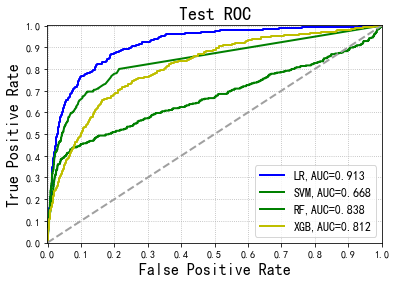

<Figure size 4000x7500 with 0 Axes>

In [63]:
LR_fpr,LR_tpr,LR_threasholds=roc_curve(y_test,LR_y_proba[:,1]) 
SVM_fpr,SVM_tpr,SVM_threasholds=roc_curve(y_test,SVM_y_proba[:,1]) 
RF_fpr,RF_tpr,RF_threasholds=roc_curve(y_test,RF_y_proba[:,1])
XGB_fpr,XGB_tpr,XGB_threasholds=roc_curve(y_test,XGB_y_proba[:,1])
# LGBM_fpr,LGBM_tpr,LGBM_threasholds=roc_curve(y_test,LGBM_y_proba[:,1])

plt.plot(LR_fpr,LR_tpr,c='b',lw=2,label=u'LR,AUC=%.3f' % LR_auc)
plt.plot(SVM_fpr,SVM_tpr,c='g',lw=2,label=u'SVM,AUC=%.3f' % SVM_auc)
plt.plot(RF_fpr,RF_tpr,c='g',lw=2,label=u'RF,AUC=%.3f' % RF_auc)
plt.plot(XGB_fpr,XGB_tpr,c='y',lw=2,label=u'XGB,AUC=%.3f' % XGB_auc)
# plt.plot(LGBM_fpr,LGBM_tpr,c='y',lw=2,label=u'LGBM,AUC=%.3f' % LGBM_auc)

plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'Test ROC', fontsize=18)


plt.savefig('test_roc.png', dpi = 400)
plt.savefig('test_roc.jpeg', dpi = 400)



fig = plt.figure(figsize=(8, 15), dpi= 500)
plt.show() 

超参数设置

In [64]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

In [65]:
seed = 24

In [66]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#2.Support Vector Machines"""
SVM = SVC(gamma = "auto")

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

"""#4.KNN"""
knn = KNeighborsClassifier()

"""#5.Gaussian Naive Bayes"""
gnb = GaussianNB()

"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)

"""#7.Gradient Boosting Classifier"""
gbc = GradientBoostingClassifier(random_state = seed)

"""#8.Adaboost Classifier"""
abc = AdaBoostClassifier(random_state = seed)

"""#9.ExtraTrees Classifier"""
etc = ExtraTreesClassifier(random_state = seed)

"""#10.Extreme Gradient Boosting"""
xgbc = XGBClassifier(random_state = seed)


"""List of all the models with their indices."""
modelNames = ["LR", "SVM", "RF", "KNN", "GNB", "DT", "GBC", "ABC", "ETC", "XGBC"]
models = [lr, SVM, rf, knn, gnb, dt, gbc, abc, etc, xgbc]

In [67]:


"""Define all the models" hyperparameters one by one first::"""

"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}

"""For GBC, the following hyperparameters are usually tunned."""
gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
              "max_depth": [4, 6, 8],
              "max_features": [1.0, 0.3, 0.1], 
              "min_samples_split": [ 2, 3, 4],
              "random_state":[seed]}

"""For SVM, the following hyperparameters are usually tunned."""
SVMParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}

"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}

"""For KNN, the following hyperparameters are usually tunned."""
knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}

"""For ABC, the following hyperparameters are usually tunned."""
abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[seed]}

"""For ETC, the following hyperparameters are usually tunned."""
etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"], 
              "random_state":[seed]}

"""For XGBC, the following hyperparameters are usually tunned."""
xgbcParams = {"n_estimators": (150, 250, 350, 450, 550, 650, 700, 800, 850, 1000),
              "learning_rate": (0.01, 0.6),
              "subsample": (0.3, 0.9),
              "max_depth": np.arange(3,10),
              "colsample_bytree": (0.5, 0.9),
              "min_child_weight": [1, 2, 3, 4],
              "random_state":[seed]}

In [68]:
"""Create a function to tune hyperparameters of the selected models."""
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    # Construct grid search object with 5 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=5, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(X_train, y_train)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams

In [69]:

# modelNamesToTune = [x for x in modelNames if x not in ["GNB"]]
# modelsToTune = [lr, SVM, rf, xgbc]
# parametersLists = [lrParams, SVMParams, rfParams,  xgbcParams]
# bestScoreAndHyperparameters = list(map(tuneHyperparameters, modelsToTune, parametersLists))


[(78.86, {'C': 21.544346900318832, 'max_iter': 5000, 'penalty': 'l2'}), (78.23, {'C': 6, 'gamma': 0.2, 'kernel': 'rbf'}), (79.97, {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 10, 'random_state': 44}), (77.6, {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}), (78.23, {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15, 'random_state': 24}), (79.49, {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 4, 'random_state': 24}), (78.55, {'learning_rate': 1.5, 'n_estimators': 40, 'random_state': 24}), (78.39, {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 24}), (80.44, {'colsample_bytree': 0.5, 'learning_rate': 0.6, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 250, 'random_state': 24, 'subsample': 0.3})]

校准曲线

In [70]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [75]:
clf_list = [
    (LR, "LR"),
    (RF, "RF"),
    (XGB, "XGB"),
    (SVM, "SVM")
]

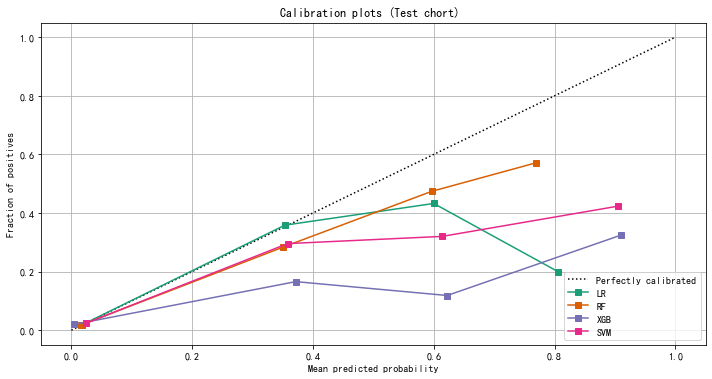

In [76]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=4,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Test chort) ")


plt.savefig('cal_Test chort.png', dpi = 400)
plt.savefig('cal_Test chort.jpeg', dpi = 400)


plt.tight_layout()
plt.show()

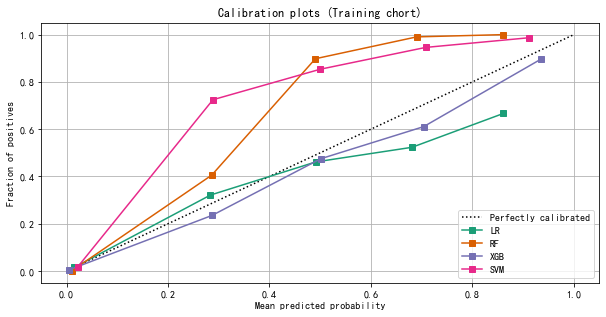

In [77]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_train,
        y_train,
        n_bins=5,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Training chort)")


plt.savefig('cal_Training chort.png', dpi = 400)
plt.savefig('cal_Training chort.jpeg', dpi = 400)



#plt.tight_layout()
plt.show()